Here is the links for Expresso Customer Churn Prediction

Train dataset = https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge?select=Train.csv

Test dataset = https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge?select=Test.csv

Sample Submission = https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge?select=SampleSubmission.csv

**Problem** **Statement**

The objective of the EXpresso Customer Churn Prediction is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from Expresso.

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

Airtime refers to the amount of time that customers can use to make calls or send text messages using their mobile phones. Expresso offers different airtime packages that vary in price and duration. Customers can choose the package that best suits their needs and budget. They can also purchase airtime in different denominations depending on the amount of credit they require.

Mobile data bundles, on the other hand, allow customers to access the internet using their mobile devices. Expresso offers a range of data bundles that provide customers with different amounts of data at different prices. These bundles are designed to meet the needs of customers who use the internet for different purposes, such as browsing the web, streaming videos, or downloading files.

Expresso also provides other services to customers, such as international calling, roaming services, and value-added services like caller tunes and SMS alerts. These services are designed to enhance the customer experience and provide additional value to customers.

To purchase airtime or mobile data bundles from Expresso, customers can use a range of channels, including the company's website, mobile app, or through authorized resellers. Payments can be made using various methods, including mobile money, bank transfer, or cash payments at authorized retailers.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. Expresso offers a wide range of products and services to meet the needs of customers.

Variables Definition

The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

1.user_id

2.REGION : the location of each client

3.TENURE : duration in the network

4.MONTANT : top-up amount

5.FREQUENCE_RECH : Â number of times the customer refilled

6.REVENUE : monthly income of each client

7.ARPU_SEGMENT : income over 90 days / 3

8.FREQUENCE : number of times the client has made an income

9.DATA_VOLUME : number of connections

10.ON_NET : inter expresso call

11.ORANGE : call to orange

12.TIGO : call to Tigo

13.ZONE1 : call to zones1

14.ZONE2 : call to zones2

15.MRG : a client who is going

16.REGULARITY : number of times the client is active for 90 days

17.TOP_PACK : he most active packs

18.FREQ_TOP_PACK : number of times the client has activated the top pack packages

19.CHURN : target variable to predict(the rate at which your business loses customers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_df=pd.read_csv("/content/drive/MyDrive/Train (4).csv",nrows=5600)
test_df=pd.read_csv("/content/drive/MyDrive/Test (1).csv",nrows=2600)

In [3]:
subset_1=train_df.sample(5600)
print(subset_1.shape)

(5600, 19)


In [4]:
subset_2=test_df.sample(2600)
print(subset_2.shape)

(2600, 18)


In [5]:
subset_1.head()

user_id   REGION        TENURE  \
4173  007d8e45de25e02dccb916a515899d0bce3ed700      NaN  K > 24 month   
4913  009564d913810477c642fdbb722b4bd60af3fc8e  KAOLACK  K > 24 month   
299   00093afb71b6930970647069fed68b71ea8136ef    THIES  K > 24 month   
1511  002e1aa51ece81edd5c20d74bc7c3c34588ae4cb      NaN  K > 24 month   
1515  002e4eb24c252c7341ddffd2c92fdb31ea353179  KAOLACK  K > 24 month   

      MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
4173   2800.0             5.0   2800.0         933.0        4.0        287.0   
4913   1000.0             1.0    200.0          67.0        1.0          NaN   
299    3000.0             5.0   3505.0        1168.0        8.0          NaN   
1511      NaN             NaN      NaN           NaN        NaN          0.0   
1515   1500.0             2.0   1500.0         500.0        3.0         56.0   

      ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
4173   329.0     5.0   1.0    NaN    NaN  NO          20   
4913    27.0     4.0   0.0    NaN    NaN  NO          52   
299    221.0    28.0  12.0    NaN    NaN  NO          53   
1511     NaN     0.0   NaN    NaN    NaN  NO          18   
1515     NaN     0.0   9.0    NaN    NaN  NO          25   

                            TOP_PACK  FREQ_TOP_PACK  CHURN  
4173  On net 200F=Unlimited _call24H            3.0      0  
4913  On net 200F=Unlimited _call24H            1.0      0  
299              On-net 500=4000,10d            3.0      0  
1511                             NaN            NaN      0  
1515                             NaN            NaN      0

In [6]:
subset_1.tail()

user_id       REGION        TENURE  \
4603  008b6f807575978fb9d2bbee79384107cc097aae  TAMBACOUNDA  K > 24 month   
5030  009984cc54fa37c48164b5e956d556ddbddb51e4        DAKAR  K > 24 month   
1798  0036f2dd0947fc6903d67b89498fbdde67919091      KAOLACK  K > 24 month   
4377  00844883298604e912289747fda494ba7f4ab37c          NaN  K > 24 month   
5170  009e076b7402e8dd76eb13df8b19bfac0dc398de          NaN  K > 24 month   

      MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
4603   2150.0            10.0   2053.0         684.0       10.0        359.0   
5030  15000.0            43.0  14523.0        4841.0       52.0      16860.0   
1798      NaN             NaN   1000.0         333.0        1.0          NaN   
4377      NaN             NaN      NaN           NaN        NaN          NaN   
5170      NaN             NaN      NaN           NaN        NaN        332.0   

      ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
4603   137.0    49.0   NaN    NaN    NaN  NO          58   
5030     4.0    55.0   NaN    1.0    0.0  NO          62   
1798     NaN    34.0   NaN    NaN    NaN  NO          48   
4377     NaN     NaN   NaN    NaN    NaN  NO           8   
5170     1.0     NaN   NaN    NaN    NaN  NO           3   

                                  TOP_PACK  FREQ_TOP_PACK  CHURN  
4603        On net 200F=Unlimited _call24H            7.0      0  
5030               Data:200F=Unlimited,24H           27.0      0  
1798  All-net 500F =2000F_AllNet_Unlimited            2.0      0  
4377                                   NaN            NaN      0  
5170                                   NaN            NaN      1

In [7]:
subset_1.describe(include='all')

user_id REGION        TENURE  \
count                                       5600   3410          5600   
unique                                      5600     13             8   
top     007d8e45de25e02dccb916a515899d0bce3ed700  DAKAR  K > 24 month   
freq                                           1   1321          5328   
mean                                         NaN    NaN           NaN   
std                                          NaN    NaN           NaN   
min                                          NaN    NaN           NaN   
25%                                          NaN    NaN           NaN   
50%                                          NaN    NaN           NaN   
75%                                          NaN    NaN           NaN   
max                                          NaN    NaN           NaN   

             MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT    FREQUENCE  \
count    3631.000000     3631.000000   3693.000000   3693.000000  3693.000000   
unique           NaN             NaN           NaN           NaN          NaN   
top              NaN             NaN           NaN           NaN          NaN   
freq             NaN             NaN           NaN           NaN          NaN   
mean     5389.320848       11.213164   5385.562415   1795.196588    13.632006   
std      6900.116288       12.779579   6941.404329   2313.791684    14.144806   
min        50.000000        1.000000      1.000000      0.000000     1.000000   
25%      1000.000000        2.000000   1000.000000    333.000000     3.000000   
50%      3000.000000        6.000000   2990.000000    997.000000     9.000000   
75%      7100.000000       15.000000   7291.000000   2430.000000    19.000000   
max     91500.000000       92.000000  93195.000000  31065.000000    83.000000   

          DATA_VOLUME        ON_NET       ORANGE         TIGO       ZONE1  \
count     2795.000000   3545.000000  3239.000000  2232.000000  436.000000   
unique            NaN           NaN          NaN          NaN         NaN   
top               NaN           NaN          NaN          NaN         NaN   
freq              NaN           NaN          NaN          NaN         NaN   
mean      3880.794275    274.248801    92.743439    22.036290    9.091743   
std      25619.394315    861.189083   195.905416    55.348916   47.852127   
min          0.000000      0.000000     0.000000     0.000000    0.000000   
25%          0.000000      5.000000     7.000000     2.000000    0.000000   
50%        300.000000     26.000000    29.000000     6.000000    1.000000   
75%       2752.500000    148.000000    96.000000    21.000000    3.000000   
max     926547.000000  11987.000000  3280.000000  1374.000000  820.000000   

             ZONE2   MRG   REGULARITY               TOP_PACK  FREQ_TOP_PACK  \
count   351.000000  5600  5600.000000                   3237    3237.000000   
unique         NaN     1          NaN                     61            NaN   
top            NaN    NO          NaN  All-net 500F=2000F;5d            NaN   
freq           NaN  5600          NaN                    841            NaN   
mean      9.746439   NaN    27.716071                    NaN       8.981464   
std      54.535138   NaN    22.282132                    NaN      11.409001   
min       0.000000   NaN     1.000000                    NaN       1.000000   
25%       0.000000   NaN     6.000000                    NaN       2.000000   
50%       1.000000   NaN    24.000000                    NaN       5.000000   
75%       5.000000   NaN    50.000000                    NaN      11.000000   
max     932.000000   NaN    62.000000                    NaN     120.000000   

              CHURN  
count   5600.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.185179  
std        0.388477  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
subset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 4173 to 5170
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         5600 non-null   object 
 1   REGION          3410 non-null   object 
 2   TENURE          5600 non-null   object 
 3   MONTANT         3631 non-null   float64
 4   FREQUENCE_RECH  3631 non-null   float64
 5   REVENUE         3693 non-null   float64
 6   ARPU_SEGMENT    3693 non-null   float64
 7   FREQUENCE       3693 non-null   float64
 8   DATA_VOLUME     2795 non-null   float64
 9   ON_NET          3545 non-null   float64
 10  ORANGE          3239 non-null   float64
 11  TIGO            2232 non-null   float64
 12  ZONE1           436 non-null    float64
 13  ZONE2           351 non-null    float64
 14  MRG             5600 non-null   object 
 15  REGULARITY      5600 non-null   int64  
 16  TOP_PACK        3237 non-null   object 
 17  FREQ_TOP_PACK   3237 non-null 

In [9]:
subset_1.nunique()

user_id           5600
REGION              13
TENURE               8
MONTANT            455
FREQUENCE_RECH      78
REVENUE           2029
ARPU_SEGMENT      1582
FREQUENCE           81
DATA_VOLUME       1445
ON_NET             775
ORANGE             469
TIGO               170
ZONE1               43
ZONE2               39
MRG                  1
REGULARITY          62
TOP_PACK            61
FREQ_TOP_PACK       74
CHURN                2
dtype: int64

In [10]:
subset_1.isnull().sum()

user_id              0
REGION            2190
TENURE               0
MONTANT           1969
FREQUENCE_RECH    1969
REVENUE           1907
ARPU_SEGMENT      1907
FREQUENCE         1907
DATA_VOLUME       2805
ON_NET            2055
ORANGE            2361
TIGO              3368
ZONE1             5164
ZONE2             5249
MRG                  0
REGULARITY           0
TOP_PACK          2363
FREQ_TOP_PACK     2363
CHURN                0
dtype: int64

In [11]:
subset_2.isnull().sum()

user_id              0
REGION             998
TENURE               0
MONTANT            915
FREQUENCE_RECH     915
REVENUE            874
ARPU_SEGMENT       874
FREQUENCE          874
DATA_VOLUME       1277
ON_NET             974
ORANGE            1094
TIGO              1562
ZONE1             2382
ZONE2             2437
MRG                  0
REGULARITY           0
TOP_PACK          1092
FREQ_TOP_PACK     1092
dtype: int64

In [12]:
print(subset_1['REGION'].value_counts())

DAKAR          1321
THIES           473
SAINT-LOUIS     325
LOUGA           243
KAOLACK         239
DIOURBEL        178
TAMBACOUNDA     139
KAFFRINE        120
FATICK          109
KOLDA           102
MATAM            85
ZIGUINCHOR       69
SEDHIOU           7
Name: REGION, dtype: int64


In [13]:
print(subset_1['TENURE'].value_counts())

K > 24 month     5328
I 18-21 month     109
H 15-18 month      61
G 12-15 month      46
J 21-24 month      28
F 9-12 month       18
E 6-9 month         6
D 3-6 month         4
Name: TENURE, dtype: int64


In [14]:
print(subset_1['MRG'].value_counts())

NO    5600
Name: MRG, dtype: int64


In [15]:
print(subset_1['CHURN'].value_counts())

0    4563
1    1037
Name: CHURN, dtype: int64


Text(0.5, 0, 'REGION')

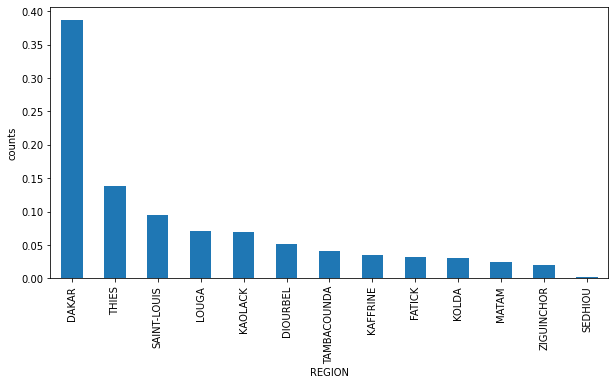

In [16]:
plt.figure(figsize=(10,5))
subset_1['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

Text(0.5, 0, 'TENURE')

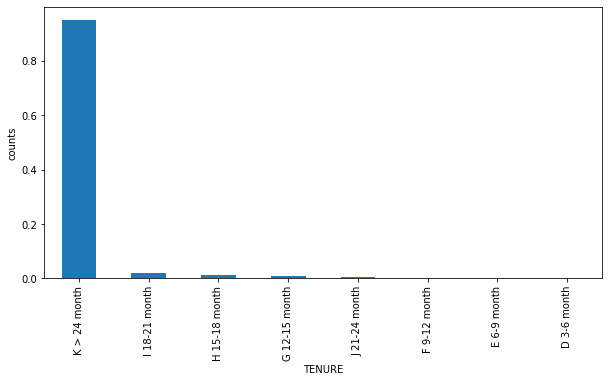

In [17]:
plt.figure(figsize=(10,5))
subset_1['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

Text(0.5, 0, 'MRG')

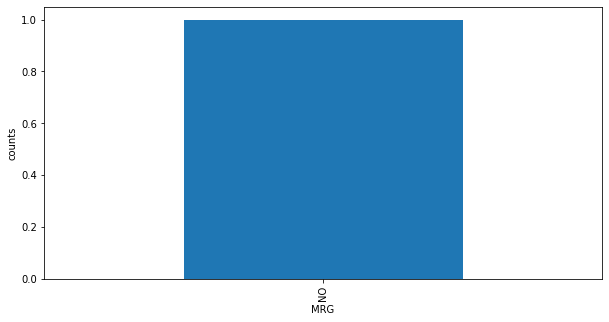

In [18]:
plt.figure(figsize=(10,5))
subset_1['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

Text(0.5, 0, 'Churn')

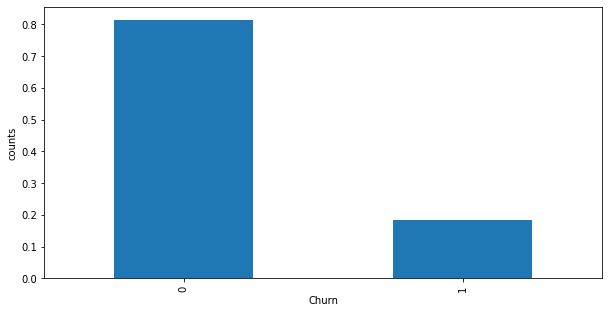

In [19]:
plt.figure(figsize=(10,5))
subset_1['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

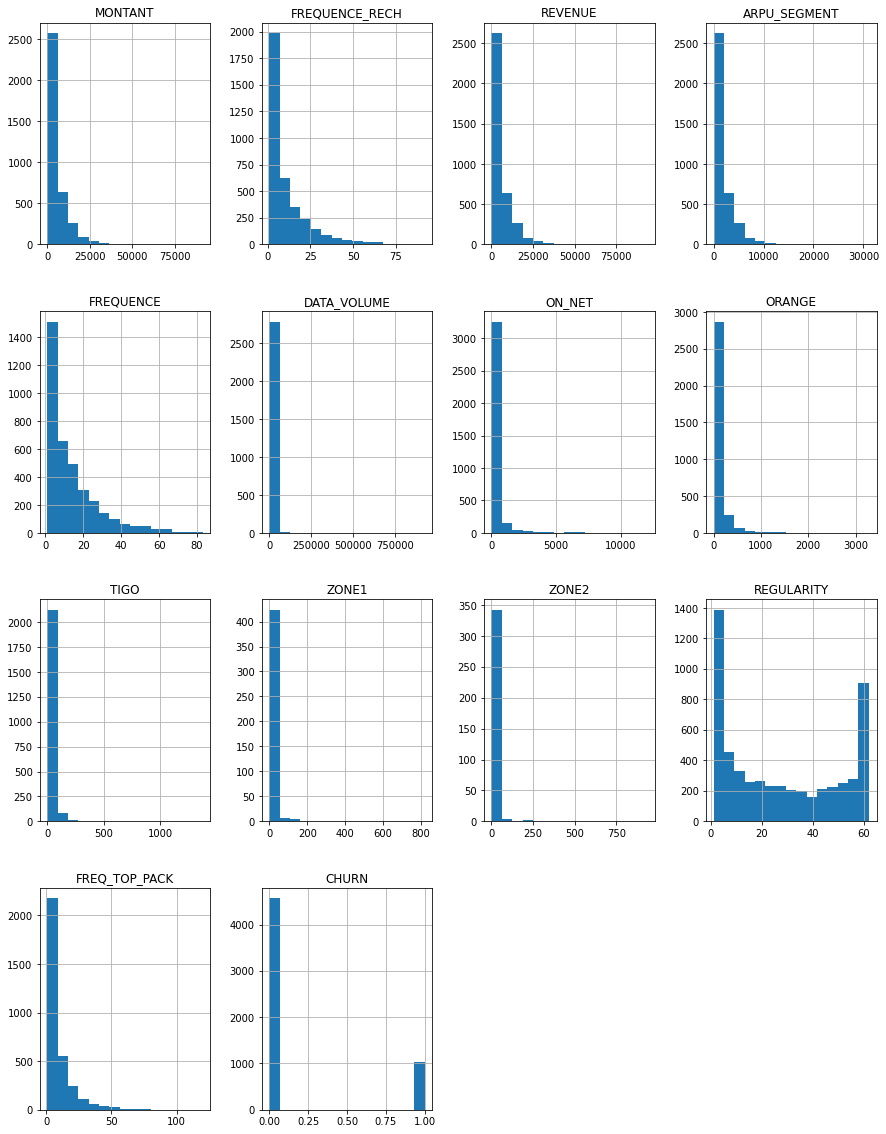

In [20]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
subset_1.hist(ax = ax, bins = 15)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

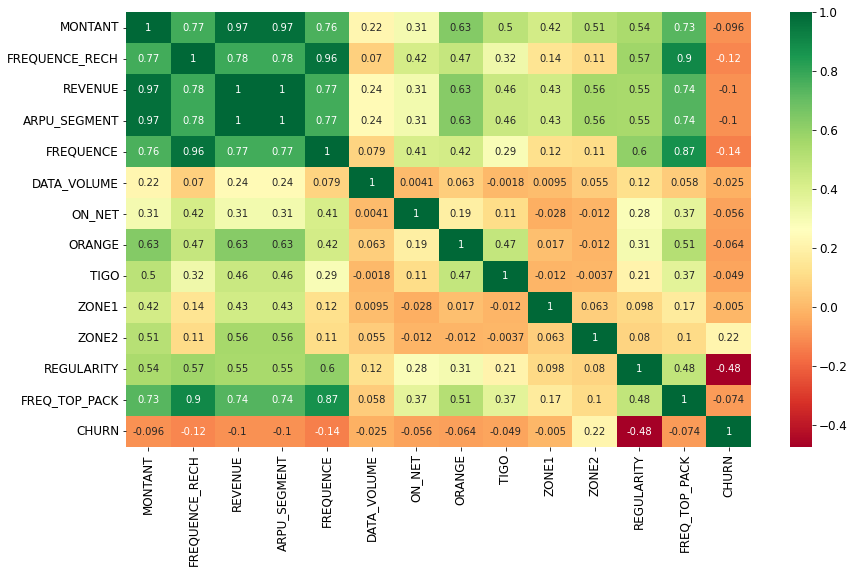

In [21]:
corrmat= subset_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

g=sns.heatmap(subset_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
subset_1['MONTANT'].fillna((subset_1['MONTANT'].median()), inplace=True)
subset_1['FREQUENCE_RECH'].fillna((subset_1['FREQUENCE_RECH'].median()), inplace=True)
subset_1['REVENUE'].fillna((subset_1['REVENUE'].median()), inplace=True)
subset_1['ARPU_SEGMENT'].fillna((subset_1['ARPU_SEGMENT'].median()), inplace=True)
subset_1['FREQUENCE'].fillna((subset_1['FREQUENCE'].median()), inplace=True)
subset_1['DATA_VOLUME'].fillna((subset_1['DATA_VOLUME'].median()), inplace=True)
subset_1['ON_NET'].fillna((subset_1['ON_NET'].median()), inplace=True)
subset_1['ORANGE'].fillna((subset_1['ORANGE'].median()), inplace=True)
subset_1['TIGO'].fillna((subset_1['TIGO'].median()), inplace=True)
subset_1['ZONE1'].fillna((subset_1['ZONE1'].median()), inplace=True)
subset_1['ZONE2'].fillna((subset_1['ZONE2'].median()), inplace=True)
subset_1['FREQ_TOP_PACK'].fillna((subset_1['FREQ_TOP_PACK'].median()), inplace=True)

In [23]:
subset_1.head()

user_id   REGION        TENURE  \
4173  007d8e45de25e02dccb916a515899d0bce3ed700      NaN  K > 24 month   
4913  009564d913810477c642fdbb722b4bd60af3fc8e  KAOLACK  K > 24 month   
299   00093afb71b6930970647069fed68b71ea8136ef    THIES  K > 24 month   
1511  002e1aa51ece81edd5c20d74bc7c3c34588ae4cb      NaN  K > 24 month   
1515  002e4eb24c252c7341ddffd2c92fdb31ea353179  KAOLACK  K > 24 month   

      MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
4173   2800.0             5.0   2800.0         933.0        4.0        287.0   
4913   1000.0             1.0    200.0          67.0        1.0        300.0   
299    3000.0             5.0   3505.0        1168.0        8.0        300.0   
1511   3000.0             6.0   2990.0         997.0        9.0          0.0   
1515   1500.0             2.0   1500.0         500.0        3.0         56.0   

      ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
4173   329.0     5.0   1.0    1.0    1.0  NO          20   
4913    27.0     4.0   0.0    1.0    1.0  NO          52   
299    221.0    28.0  12.0    1.0    1.0  NO          53   
1511    26.0     0.0   6.0    1.0    1.0  NO          18   
1515    26.0     0.0   9.0    1.0    1.0  NO          25   

                            TOP_PACK  FREQ_TOP_PACK  CHURN  
4173  On net 200F=Unlimited _call24H            3.0      0  
4913  On net 200F=Unlimited _call24H            1.0      0  
299              On-net 500=4000,10d            3.0      0  
1511                             NaN            5.0      0  
1515                             NaN            5.0      0

In [24]:
subset_1.drop(columns=['MRG','REGION','TENURE','TOP_PACK'], inplace=True)
subset_2.drop(columns=['MRG','REGION','TENURE','TOP_PACK'], inplace=True)

In [25]:
subset_1.isnull().sum()

user_id           0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [26]:
subset_2['MONTANT'].fillna((subset_2['MONTANT'].median()), inplace=True)
subset_2['FREQUENCE_RECH'].fillna((subset_2['FREQUENCE_RECH'].median()), inplace=True)
subset_2['REVENUE'].fillna((subset_2['REVENUE'].median()), inplace=True)
subset_2['ARPU_SEGMENT'].fillna((subset_2['ARPU_SEGMENT'].median()), inplace=True)
subset_2['FREQUENCE'].fillna((subset_2['FREQUENCE'].median()), inplace=True)
subset_2['DATA_VOLUME'].fillna((subset_2['DATA_VOLUME'].median()), inplace=True)
subset_2['ON_NET'].fillna((subset_2['ON_NET'].median()), inplace=True)
subset_2['ORANGE'].fillna((subset_2['ORANGE'].median()), inplace=True)
subset_2['TIGO'].fillna((subset_2['TIGO'].median()), inplace=True)
subset_2['ZONE1'].fillna((subset_2['ZONE1'].median()), inplace=True)
subset_2['ZONE2'].fillna((subset_2['ZONE2'].median()), inplace=True)
subset_2['FREQ_TOP_PACK'].fillna((subset_2['FREQ_TOP_PACK'].median()), inplace=True)

In [27]:
subset_1.isnull().sum()

user_id           0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [28]:
subset_2.isnull().sum()

user_id           0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [29]:
subset_1.head(7)

user_id  MONTANT  FREQUENCE_RECH  \
4173  007d8e45de25e02dccb916a515899d0bce3ed700   2800.0             5.0   
4913  009564d913810477c642fdbb722b4bd60af3fc8e   1000.0             1.0   
299   00093afb71b6930970647069fed68b71ea8136ef   3000.0             5.0   
1511  002e1aa51ece81edd5c20d74bc7c3c34588ae4cb   3000.0             6.0   
1515  002e4eb24c252c7341ddffd2c92fdb31ea353179   1500.0             2.0   
4808  0091c59c25539584355365e989657b0ff2e40d77   3000.0             6.0   
1915  003a5f4713715fdb8677424bbc8c9ed17bd6dddd   3000.0             6.0   

      REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  \
4173   2800.0         933.0        4.0        287.0   329.0     5.0   1.0   
4913    200.0          67.0        1.0        300.0    27.0     4.0   0.0   
299    3505.0        1168.0        8.0        300.0   221.0    28.0  12.0   
1511   2990.0         997.0        9.0          0.0    26.0     0.0   6.0   
1515   1500.0         500.0        3.0         56.0    26.0     0.0   9.0   
4808   2990.0         997.0        9.0        300.0    26.0    29.0   6.0   
1915   2990.0         997.0        9.0        300.0    26.0    29.0   6.0   

      ZONE1  ZONE2  REGULARITY  FREQ_TOP_PACK  CHURN  
4173    1.0    1.0          20            3.0      0  
4913    1.0    1.0          52            1.0      0  
299     1.0    1.0          53            3.0      0  
1511    1.0    1.0          18            5.0      0  
1515    1.0    1.0          25            5.0      0  
4808    1.0    1.0           1            5.0      1  
1915    1.0    1.0           2            5.0      0

In [30]:
subset_2.head()

user_id  MONTANT  FREQUENCE_RECH  \
1761  012b1c258e546fa08a87a5a37832bcc118fe2df3   3000.0             6.0   
212   00239a1d25b5af90f2ea984c49a4f12fdb216280   3000.0             6.0   
907   009882d31c9387669cabda4c0b1eb68d0321a8f4   3000.0             6.0   
2380  01936e98c611d43e4cad63b2ff2908cf82005274   3050.0            12.0   
1991  01515b7a8d2c1e019fa2d69b55c8df30fc5a0069    500.0             2.0   

      REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  \
1761   2867.5         956.0        8.0        243.0    26.0    29.0   6.0   
212     501.0         167.0        4.0        243.0     8.0     0.0   6.0   
907    2867.5         956.0        8.0          0.0    26.0    29.0   6.0   
2380   3059.0        1020.0       14.0          0.0    56.0    21.0   1.0   
1991    500.0         167.0        2.0          1.0   115.0     6.0  15.0   

      ZONE1  ZONE2  REGULARITY  FREQ_TOP_PACK  
1761    1.0    1.0           4            4.0  
212     1.0    1.0          37            4.0  
907     1.0    1.0          57            4.0  
2380    1.0    1.0          59            2.0  
1991    1.0    1.0           5            2.0

In [31]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.variance = None
    
    def fit(self, subset_1):
        self.mean = np.mean(subset_1, axis=0)
        self.variance = np.var(subset_1, axis=0)
    
    def transform(self, subset_1):
        return (subset_1 - self.mean) / np.sqrt(self.variance)
    
    def fit_transform(self, subset_1):
        self.fit(subset_1)
        return self.transform(subset_1)

In [32]:
scaler = StandardScaler()

In [33]:

subset_1['MONTANT'] = scaler.fit_transform(subset_1[['MONTANT']])
subset_1['FREQUENCE_RECH'] = scaler.fit_transform(subset_1[['FREQUENCE_RECH']])
subset_1['REVENUE'] = scaler.fit_transform(subset_1[['REVENUE']])
subset_1['ARPU_SEGMENT'] = scaler.fit_transform(subset_1[['ARPU_SEGMENT']])
subset_1['FREQUENCE'] = scaler.fit_transform(subset_1[['FREQUENCE']])
subset_1['DATA_VOLUME'] = scaler.fit_transform(subset_1[['DATA_VOLUME']])
subset_1['ON_NET'] = scaler.fit_transform(subset_1[['ON_NET']])
subset_1['ORANGE']= scaler.fit_transform(subset_1[['ORANGE']])
subset_1['TIGO'] = scaler.fit_transform(subset_1[['TIGO']])
subset_1['ZONE1']= scaler.fit_transform(subset_1[['ZONE1']])
subset_1['ZONE2'] = scaler.fit_transform(subset_1[['ZONE2']])
subset_1['REGULARITY'] = scaler.fit_transform(subset_1[['REGULARITY']])
subset_1['FREQ_TOP_PACK'] = scaler.fit_transform(subset_1[['FREQ_TOP_PACK']])
                                              

In [34]:
subset_1.head()

user_id   MONTANT  FREQUENCE_RECH  \
4173  007d8e45de25e02dccb916a515899d0bce3ed700 -0.308432       -0.413776   
4913  009564d913810477c642fdbb722b4bd60af3fc8e -0.625817       -0.791638   
299   00093afb71b6930970647069fed68b71ea8136ef -0.273167       -0.413776   
1511  002e1aa51ece81edd5c20d74bc7c3c34588ae4cb -0.273167       -0.319310   
1515  002e4eb24c252c7341ddffd2c92fdb31ea353179 -0.537655       -0.697173   

       REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME    ON_NET    ORANGE  \
4173 -0.307823     -0.308066  -0.688846    -0.098996  0.209715 -0.399777   
4913 -0.760047     -0.759951  -0.945410    -0.098281 -0.224526 -0.406345   
299  -0.185201     -0.185441  -0.346759    -0.098281  0.054423 -0.248717   
1511 -0.274776     -0.274670  -0.261238    -0.114779 -0.225964 -0.432617   
1515 -0.533935     -0.534008  -0.774367    -0.111699 -0.225964 -0.432617   

          TIGO     ZONE1     ZONE2  REGULARITY  FREQ_TOP_PACK  CHURN  
4173 -0.318141 -0.046626 -0.039733   -0.346321      -0.483693      0  
4913 -0.346069 -0.046626 -0.039733    1.089936      -0.708592      0  
299  -0.010937 -0.046626 -0.039733    1.134819      -0.483693      0  
1511 -0.178503 -0.046626 -0.039733   -0.436087      -0.258794      0  
1515 -0.094720 -0.046626 -0.039733   -0.121905      -0.258794      0

In [35]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.variance = None
    
    def fit(self, subset_2):
        self.mean = np.mean(subset_2, axis=0)
        self.variance = np.var(subset_2, axis=0)
    
    def transform(self, subset_2):
        return (subset_2 - self.mean) / np.sqrt(self.variance)
    
    def fit_transform(self, subset_2):
        self.fit(subset_2)
        return self.transform(subset_2)

In [36]:

#subset_2['TENURE'] = scaler.fit_transform[subset_2['TENURE']]
subset_2['MONTANT'] = scaler.fit_transform(subset_2[['MONTANT']])
subset_2['FREQUENCE_RECH'] = scaler.fit_transform(subset_2[['FREQUENCE_RECH']])
subset_2['REVENUE'] = scaler.fit_transform(subset_2[['REVENUE']])
subset_2['ARPU_SEGMENT'] = scaler.fit_transform(subset_2[['ARPU_SEGMENT']])
subset_2['FREQUENCE'] = scaler.fit_transform(subset_2[['FREQUENCE']])
subset_2['DATA_VOLUME'] = scaler.fit_transform(subset_2[['DATA_VOLUME']])
subset_2['ON_NET'] = scaler.fit_transform(subset_2[['ON_NET']])
subset_2['ORANGE']= scaler.fit_transform(subset_2[['ORANGE']])
subset_2['TIGO'] = scaler.fit_transform(subset_2[['TIGO']])
subset_2['ZONE1']= scaler.fit_transform(subset_2[['ZONE1']])
subset_2['ZONE2'] = scaler.fit_transform(subset_2[['ZONE2']])
subset_2['REGULARITY'] = scaler.fit_transform(subset_2[['REGULARITY']])
subset_2['FREQ_TOP_PACK'] = scaler.fit_transform(subset_2[['FREQ_TOP_PACK']])


In [37]:
subset_2.head()

user_id   MONTANT  FREQUENCE_RECH  \
1761  012b1c258e546fa08a87a5a37832bcc118fe2df3 -0.275597       -0.308890   
212   00239a1d25b5af90f2ea984c49a4f12fdb216280 -0.275597       -0.308890   
907   009882d31c9387669cabda4c0b1eb68d0321a8f4 -0.275597       -0.308890   
2380  01936e98c611d43e4cad63b2ff2908cf82005274 -0.266472        0.230535   
1991  01515b7a8d2c1e019fa2d69b55c8df30fc5a0069 -0.731860       -0.668508   

       REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME    ON_NET    ORANGE  \
1761 -0.284274     -0.284221  -0.303726    -0.212887 -0.218966 -0.219317   
212  -0.702605     -0.702645  -0.629303    -0.212887 -0.244170 -0.378797   
907  -0.284274     -0.284221  -0.303726    -0.248132 -0.218966 -0.219317   
2380 -0.250423     -0.250281   0.184640    -0.248132 -0.176959 -0.263312   
1991 -0.702782     -0.702645  -0.792092    -0.247987 -0.094345 -0.345801   

          TIGO     ZONE1     ZONE2  REGULARITY  FREQ_TOP_PACK  
1761 -0.162594 -0.078699 -0.084698   -1.064927      -0.305458  
212  -0.162594 -0.078699 -0.084698    0.412703      -0.305458  
907  -0.162594 -0.078699 -0.084698    1.308237      -0.305458  
2380 -0.293784 -0.078699 -0.084698    1.397790      -0.520540  
1991  0.073547 -0.078699 -0.084698   -1.020151      -0.520540

In [38]:
import numpy as np
from collections import Counter
import random

def gini_impurity(y):
    """Calculate the Gini impurity of a list of class labels."""
    counter = Counter(y)
    impurity = 1
    for label in counter:
        prob = counter[label] / len(y)
        impurity -= prob ** 2
    return impurity

def split_data(X, y, feature, threshold):
    """Split the data based on a feature and threshold."""
    left_X, left_y, right_X, right_y = [], [], [], []
    for i in range(len(X)):
        if X[i][feature] < threshold:
            left_X.append(X[i])
            left_y.append(y[i])
        else:
            right_X.append(X[i])
            right_y.append(y[i])
    return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

def find_best_split(X, y):
    """Find the best feature and threshold to split the data."""
    best_feature, best_threshold, best_gini = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = list(set(X[:, feature]))
        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
            if len(left_y) == 0 or len(right_y) == 0:
                continue
            gini = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)
            if gini < best_gini:
                best_feature, best_threshold, best_gini = feature, threshold, gini
    return best_feature, best_threshold

class DecisionTree:
    """A decision tree for classification."""
    
    def __init__(self, max_depth=None):
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None
        self.max_depth = max_depth
    
    def fit(self, X, y, depth=0):
        """Build the decision tree recursively."""
        if self.max_depth is not None and depth >= self.max_depth:
            self.label = Counter(y).most_common()[0][0]
            return
        if len(set(y)) == 1:
            self.label = y[0]
            return
        best_feature, best_threshold = find_best_split(X, y)
        self.feature = best_feature
        self.threshold = best_threshold
        left_X, left_y, right_X, right_y = split_data(X, y, best_feature, best_threshold)
        self.left = DecisionTree(max_depth=self.max_depth)
        self.right = DecisionTree(max_depth=self.max_depth)
        self.left.fit(left_X, left_y, depth+1)
        self.right.fit(right_X, right_y, depth+1)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for sample in X:
            node = self
            while node.label is None:
                if sample[node.feature] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.label)
        return np.array(predictions)

class RandomForestClassifier:
    """A random forest classifier."""
    
    def __init__(self,n_trees=10, n_estimators=100, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
    
    def fit(self, X, y):
        """Build the random forest classifier."""
        self.trees = []
        self.feature_indices = []
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            feature_indices = random.sample(range(n_features), self.max_features)
            self.feature_indices.append(feature_indices)
            tree_X = X[:, feature_indices]
            tree.fit(tree_X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for i in range(self.n_trees):
            tree = self.trees[i]
            feature_indices = self.feature_indices[i]
            tree_X = X[:, feature_indices]
            tree_predictions = tree.predict(tree_X)
            predictions.append(tree_predictions)
        predictions = np.array(predictions)
        return np.apply_along_axis(lambda x: Counter(x).most_common()[0][0], axis=0, arr=predictions)


In [39]:
X=subset_1.drop(['user_id','CHURN'],axis=1)
y=subset_1['CHURN']
subset_2 = subset_2.drop(columns=['user_id'], axis=1)

In [40]:
y

4173    0
4913    0
299     0
1511    0
1515    0
       ..
4603    0
5030    0
1798    0
4377    0
5170    1
Name: CHURN, Length: 5600, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [43]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [44]:
print(X_train.shape)

(4480, 13)


In [45]:
X_train.dtypes

MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY        float64
FREQ_TOP_PACK     float64
dtype: object

In [46]:
print(X_train.columns)

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')


In [47]:
X_train.isnull().sum()

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [48]:
print(X_test.shape)

(1120, 13)


In [49]:
X_test.dtypes

MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY        float64
FREQ_TOP_PACK     float64
dtype: object

In [50]:
print(y_train.shape)

(4480,)


In [51]:
print(y_train.to_frame().columns)

Index(['CHURN'], dtype='object')


In [52]:
y_train.isnull().sum()

0

In [53]:
y_train.dtypes

dtype('int64')

In [54]:
y_train = y_train.astype('float64')

In [55]:
print(y_test.shape)

(1120,)


In [56]:
y_test.dtypes

dtype('int64')

In [57]:
y_test = y_test.astype('float64')

In [58]:
X_train.head()

MONTANT  FREQUENCE_RECH   REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0 -0.185004       -0.224845 -0.099105     -0.099343  -0.346759    -0.098281   
1  3.429666        0.625345  2.996195      2.996018   0.765021    -0.114779   
2  0.678990        0.436414  0.666372      0.666149   0.679499    -0.098281   
3 -0.273167       -0.319310 -0.274776     -0.274670  -0.261238    -0.098281   
4 -0.096841        0.436414  0.032214      0.032153   0.593978    -0.114779   

     ON_NET    ORANGE      TIGO     ZONE1     ZONE2  REGULARITY  FREQ_TOP_PACK  
0 -0.079300 -0.340667 -0.150575 -0.046626 -0.039733    1.538766       0.078554  
1  0.242786  1.839862  0.352123 -0.046626 -0.039733    1.493883      -0.483693  
2  0.487227 -0.432617 -0.066792 -0.046626 -0.039733    1.314351       0.753251  
3 -0.263349 -0.242149 -0.178503 -0.046626 -0.039733   -1.199098      -0.258794  
4 -0.248970  0.184762 -0.122648 -0.046626  0.177696    0.102510       0.303453

In [59]:
print(X_train.shape)
print(X_train.columns)

(4480, 13)
Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')


In [60]:
print(y_train.to_frame().columns)

Index(['CHURN'], dtype='object')


In [61]:
y_train.name = 'CHURN'
print(y_train.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CHURN, dtype: float64


In [62]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CHURN, dtype: float64

In [63]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5,max_features=5)
clf.fit(X_train.values,y_train.values.ravel())

# Make predictions on the test data
y_pred = clf.predict(X_test.values)

In [64]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [65]:
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8169642857142857


In [146]:
def cross_val_score(estimator, X, y, cv=10, scoring=None):
    """
    Returns the scores for a given estimator and data using k-fold cross-validation.
    estimator: an object that implements the fit and predict methods
    X: array of features
    y: array of targets
    cv: number of folds (default is 10)
    scoring: scoring function to use (default is None, which uses estimator's default)
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    n_samples = X.shape[0]
    fold_size = n_samples // cv
    scores = []
    for i in range(cv):
        start = i * fold_size
        end = start + fold_size
        if i == cv - 1:
            end = n_samples
        test_indices = np.arange(start, end)
        train_indices = np.concatenate((np.arange(0, start), np.arange(end, n_samples)))
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        estimator.fit(X_train, y_train.ravel())
        y_pred = estimator.predict(X_test)
        if scoring is None:
            if hasattr(estimator, 'score'):
                score = estimator.score(X_test, y_test)
            else:
                raise ValueError("No scoring function specified and estimator has no 'score' method")
        else:
            score = scoring(y_test, y_pred)
        scores.append(score)
    return np.array(scores)

In [147]:
estimator = RandomForestClassifier()

# calculate cross-validation scores using mean squared error as the scoring function
scores = cross_val_score(estimator, X_train.values, y_train.values.ravel(), cv=5, scoring=accuracy_score)

# print the mean and standard deviation of the scores
print(f"Mean score: {np.mean(scores):.2f}")
print(f"Standard deviation: {np.std(scores):.2f}")

Mean score: 0.86
Standard deviation: 0.01


In [150]:
param_distributions = {
    "n_estimators": np.arange(10, 101, 10),
    "max_depth": [3, 5, 10, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [151]:
import random

def randomized_search(estimator, param_distributions, X, y, n_iter=10, cv=5, random_state=None, scoring=None):
    """
    Performs randomized hyperparameter search for a given estimator over a specified parameter space.
    estimator: an object that implements the fit and predict methods
    param_distributions: dictionary of hyperparameters to search over
    X: array of features
    y: array of targets
    n_iter: number of parameter settings that are sampled (default is 10)
    cv: number of folds for cross-validation (default is 5)
    random_state: random seed (default is None)
    scoring: scoring function to use (default is None, which uses estimator's default)
    """
    best_score = None
    best_params = None
    random.seed(random_state)
    for i in range(n_iter):
        params = {}
        for param, distribution in param_distributions.items():
            if isinstance(distribution, list):
                params[param] = random.choice(distribution)
            else:
                params[param] = distribution.rvs(random_state=random_state)
        score = cross_val_score(estimator(**params), X, y, cv=cv, scoring=scoring)
        if best_score is None or score.mean() > best_score:
            best_score = score.mean()
            best_params = params
    return best_score, best_params


In [178]:
estimator = RandomForestClassifier()
# Define parameter space for Random Forest classifier
param_distributions= {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 5, 10, 20],
           "max_features": ["sqrt", "log2", 0.5],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 4]}

In [191]:
def randomized_search(estimator, param_distributions, X, y, n_iter=10, cv=5, random_state=42, scoring='accuracy'):
    best_score = None
    best_params = None
    for i in range(n_iter):
        params = {}
        for param, distribution in param_distributions.items():
            params[param] = np.random.choice(distribution)
        clf = estimator.set_params(**params)
        score = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
        if best_score is None or score.mean() > best_score:
            best_score = score.mean()
            best_params = params
    return best_score, best_params


In [196]:
estimator = RandomForestClassifier()
param_distributions = {"n_estimators": np.arange(10, 100, 10),
                       "max_depth": [None, 5, 10, 20],
                       "max_features": ["sqrt", "log2"],
                       "min_samples_split": [2, 5, 10],
                       "min_samples_leaf": [1, 2, 4]}

In [208]:
random_search = randomized_search(estimator, param_distributions, X, y, n_iter=20, cv=5, random_state=42, scoring=accuracy_score)


In [205]:
best_score, best_params = random_search


In [210]:
best_score = random_search[0]
print("Best score: ", best_score)


Best score:  0.8712500000000001


In [211]:
best_params = random_search[1]
print("Best params: ", best_params)

Best params:  {'n_estimators': 60, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'min_samples_leaf': 4}


In [218]:
y_pred = estimator.predict(subset_2)

In [219]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [220]:
y_pred.size

2600

In [221]:
from imblearn.under_sampling import NearMiss

In [222]:
nm=NearMiss(0.8)
X_res,y_res=nm.fit_resample(X,y)

In [223]:
X_res.shape,y_res.shape

((2333, 13), (2333,))

In [224]:
from collections import Counter

In [225]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4563, 1: 1037})
Resampled dataset shape Counter({0: 1296, 1: 1037})
